# Read results 

### Load the required libraries

In [2]:
from __future__ import division
# Change directory to the root folder of Dispa-SET:
import os
import sys
os.chdir('..')
import numpy as np
import pandas as pd
import datetime as dt
from dispaset.postprocessing import postprocessing as post
import importlib
importlib.reload(post)
%matplotlib inline
#Import Dispa-SET
import dispaset as ds
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import matplotlib.dates as mdates
#plt.style.use('seaborn-colorblind')
import pickle
import time as tm
import logging
import matplotlib


In [3]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [16, 8]

In [4]:
pd.options.display.max_rows = 60   #default 60 (None)
pd.options.display.max_columns = 60   #default 60 (None)
np.set_printoptions(threshold=np.inf)   #default 1000 (np.inf)

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [6]:
from dispaset.postprocessing import postprocessing as post
import importlib
importlib.reload(post)

<module 'dispaset.postprocessing.postprocessing' from '/Users/abdullahalawad/Dropbox (MIT)/CCES/2017/Energy/Regional trade/UC&ED/dispaset/PycharmProjects/UC Model/dispaset/postprocessing/postprocessing.py'>

In [7]:
try:
    import cPickle as pickle
except ImportError:
    import pickle

In [8]:
def FindUniquePowerExchange(PowerExchange):
    NewPowerExchange = PowerExchange.copy()
    Combinations = []
    reverseindex = []

    for zone1 in NewPowerExchange.columns.unique(level=0):
        for zone2 in NewPowerExchange.columns.unique(level=1):
            if zone1!=zone2:
                List = [zone1,zone2]
            if List not in Combinations:
                try:
                    NewPowerExchange.drop((zone2,zone1), axis = 1, inplace = True)
                except:
                    pass
                Combinations.append(List)
                Combinations.append(list(reversed(List)))
    return NewPowerExchange

In [9]:
def FindCountryExchange(PowerExchange, InternalZones, ExternalZones):
    CountryExchange = 0
    for internalzone in InternalZones:
        for externalzone in ExternalZones:
            try:
                CountryExchange += PowerExchange[internalzone][externalzone]
            except:
                pass
    return CountryExchange

In [23]:
def FindGCCUniquePowerExchanges(PowerExchange):

    GCCUniquePowerExchanges = pd.DataFrame()
    KSA = pd.Series(FindCountryExchange(PowerExchange, ['SA_RIYADH','SA_SOA','SA_WOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_EOA'], ['BA','KW','OM','QA','UAE']))
    KSA.name = 'KSA'
    GCCUniquePowerExchanges = GCCUniquePowerExchanges.append(KSA, ignore_index = False)
    OM = pd.Series(FindCountryExchange(PowerExchange, ['OM'], ['BA','KW''SA_RIYADH','SA_SOA','SA_WOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_EOA','QA','UAE']))
    OM.name = 'OM'
    GCCUniquePowerExchanges = GCCUniquePowerExchanges.append(OM, ignore_index = False)
    UAE = pd.Series(FindCountryExchange(PowerExchange, ['UAE'], ['BA','KW','OM','QA''SA_RIYADH','SA_SOA','SA_WOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_EOA']))
    UAE.name = 'UAE'
    GCCUniquePowerExchanges = GCCUniquePowerExchanges.append(UAE, ignore_index = False)
    KW = pd.Series(FindCountryExchange(PowerExchange, ['KW'], ['BA''SA_RIYADH','SA_SOA','SA_WOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_EOA','OM','QA','UAE']))
    KW.name = 'KW'
    GCCUniquePowerExchanges = GCCUniquePowerExchanges.append(KW, ignore_index = False)
    BA = pd.Series(FindCountryExchange(PowerExchange, ['BA'], ['SA_RIYADH','SA_SOA','SA_WOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_EOA','KW','OM','QA','UAE']))
    BA.name = 'BA'
    GCCUniquePowerExchanges = GCCUniquePowerExchanges.append(BA, ignore_index = False)
    QA = pd.Series(FindCountryExchange(PowerExchange, ['QA'], ['BA','KW','OM''SA_RIYADH','SA_SOA','SA_WOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_EOA','UAE']))
    QA.name = 'QA'
    GCCUniquePowerExchanges = GCCUniquePowerExchanges.append(QA, ignore_index = False)
    
    return GCCUniquePowerExchanges.T


In [26]:
results['ExportedPowerToNode']

SA_EOA                                       \
                       SA_RIYADH   SA_QASSIM     SA_HAIL       SA_WOA   
2016-07-11 00:00:00  1194.242482    0.000000  113.451674   706.172818   
2016-07-11 01:00:00     0.000000  621.238007  103.831674     0.000000   
2016-07-11 02:00:00     0.000000    0.000000   92.956674     0.000000   
2016-07-11 03:00:00  1308.648000    0.000000   80.595674  2953.463482   
2016-07-11 04:00:00     0.000000    0.000000   74.746674  1712.616518   
2016-07-11 05:00:00     0.000000    0.000000   95.210674   746.606682   
2016-07-11 06:00:00  1016.071573    0.000000   70.405674  3555.732611   
2016-07-11 07:00:00     0.000000    0.000000   89.909674  1364.772940   
2016-07-11 08:00:00     0.000000    0.000000    0.000000     0.000000   
2016-07-11 09:00:00   364.416324    0.000000    0.000000  4204.839971   
2016-07-11 10:00:00  2683.066524    0.000000    0.000000  2220.613677   
2016-07-11 11:00:00  2807.047823    0.000000    0.000000  2589.613262   
2016-07-11 12:00:00  2972.689368  449.759047    0.000000  2797.037920   
2016-07-11 13:00:00  1688.776015    0.000000    0.000000   759.718961   
2016-07-11 14:00:00  1943.300169    0.000000    0.000000   582.212367   
2016-07-11 15:00:00   998.563404    0.000000    0.000000   674.260996   
2016-07-11 16:00:00   955.022164    0.000000    0.000000   845.384599   
2016-07-11 17:00:00  1854.709901    0.000000    0.000000   842.207708   
2016-07-11 18:00:00  1907.792692    0.000000    0.000000     0.000000   
2016-07-11 19:00:00  1714.827931    0.000000    0.000000  3562.810107   
2016-07-11 20:00:00   614.334997  722.309791    0.000000   553.426091   
2016-07-11 21:00:00     0.000000    0.000000    0.000000  1665.447010   
2016-07-11 22:00:00  1891.051280    0.000000    0.000000     0.000000   
2016-07-11 23:00:00     0.000000    0.000000    0.000000     0.000000   
2016-07-12 00:00:00   937.154472    0.000000    0.000000     0.000000   
2016-07-12 01:00:00  1117.111911    0.000000    0.000000     0.000000   
2016-07-12 02:00:00  1190.410798    0.000000    0.000000     0.000000   
2016-07-12 03:00:00  1712.819275    0.000000  100.766674  1877.180725   
2016-07-12 04:00:00     0.000000    0.000000    0.000000     0.000000   
2016-07-12 05:00:00     0.000000    0.000000  126.749674     0.000000   
...                          ...         ...         ...          ...   
2016-07-16 18:00:00  1382.779021    0.000000    0.000000     0.000000   
2016-07-16 19:00:00   232.006528    0.000000    0.000000     0.000000   
2016-07-16 20:00:00   137.569205    0.000000    0.000000  2176.269293   
2016-07-16 21:00:00   655.135685    0.000000    0.000000   991.886060   
2016-07-16 22:00:00   382.141969    0.000000    0.000000  4468.329637   
2016-07-16 23:00:00  2257.754047    0.000000    0.000000   974.488482   
2016-07-17 00:00:00  1877.392060    0.000000    0.000000     0.000000   
2016-07-17 01:00:00  1240.092280    0.000000    0.000000  1170.189712   
2016-07-17 02:00:00  1373.826798    0.000000    0.000000     0.000000   
2016-07-17 03:00:00  1199.958798    0.000000  120.889674     0.000000   
2016-07-17 04:00:00   968.595798    0.000000  102.745674  2158.123432   
2016-07-17 05:00:00  3477.243757    0.000000    0.000000     0.000000   
2016-07-17 06:00:00  1749.929232    0.000000    0.000000  1212.804892   
2016-07-17 07:00:00   302.177716    0.000000    0.000000  1411.835369   
2016-07-17 08:00:00  1310.557699    0.000000    0.000000   879.271317   
2016-07-17 09:00:00   837.050702    0.000000    0.000000     0.000000   
2016-07-17 10:00:00     0.000000    0.000000    0.000000     0.000000   
2016-07-17 11:00:00     0.000000    0.000000  127.878674  1655.598602   
2016-07-17 12:00:00   512.297914    0.000000    0.000000     0.000000   
2016-07-17 13:00:00     0.000000    0.000000    0.000000  2432.296352   
2016-07-17 14:00:00   725.996200    0.000000    0.000000     0.000000   
2016-07-17 15:00:00     0.000000    0.000000    0.000000  4217.672427   
2016-07-17 

In [24]:
FindGCCUniquePowerExchanges(results['ExportedPowerToNode'])

,KSA,OM,UAE,KW,BA,QA
2016-07-11 00:00:00,6299.670000,0.000000,7989.670000,1550.000000,0.000000,5975.470000
2016-07-11 01:00:00,23381.043677,0.000000,11914.125364,7781.973312,0.000000,5851.070000
2016-07-11 02:00:00,15601.075000,0.000000,7761.830000,10878.505000,0.000000,5747.630000
2016-07-11 03:00:00,19846.001483,0.000000,12218.231965,4985.259518,0.000000,5614.900000
2016-07-11 04:00:00,7409.680000,0.000000,6816.346811,1550.000000,0.000000,5599.680000
2016-07-11 05:00:00,16721.452360,0.000000,11088.674603,5515.870000,0.000000,5530.070000
2016-07-11 06:00:00,9362.788946,2067.319575,7347.329149,2012.069631,0.000000,5397.329149
2016-07-11 07:00:00,17298.080098,0.000000,11733.223480,5547.513278,0.000000,5497.513278
2016-07-11 08:00:00,11485.201397,3892.508855,2956.062575,1614.200000,0.000000,5718.492541
2016-07-11 09:00:00,8875.520663,137.300674,10428.219989,3097.627321,0.000000,6022.019989


In [11]:
def FindCountryExchange(PowerExchange, InternalZones, ExternalZones):
    CountryExchange = 0
    for internalzone in InternalZones:
        for externalzone in ExternalZones:
            try:
                CountryExchange += PowerExchange[internalzone][externalzone]
            except:
                pass
    return CountryExchange

In [12]:
def FindAverageElectricityCostPlusKSA(Demand, TotalNodeOperationCost, DropKSAZones = True):
    A = pd.Series((Demand.sum().drop(['BA','KW','OM','QA','UAE'])).sum())
    A.name = 'KSA'
    System_demand = pd.DataFrame(Demand.sum())
    System_demand = System_demand.append(A, ignore_index = False)
    if DropKSAZones:
        System_demand = System_demand.drop(index = ['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])
    System_demand.columns = ['TotalDemand']
        
    A = pd.Series((TotalNodeOperationCost.sum()).drop(['BA','KW','OM','QA','UAE']).sum())
    A.name = 'KSA'
    SystemCost = pd.DataFrame(TotalNodeOperationCost.sum())
    SystemCost = SystemCost.append(A, ignore_index = False)
    if DropKSAZones:
        SystemCost = SystemCost.drop(index=['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])
    SystemCost.columns = ['SystemCost']

    ElectricityCost = pd.Series(SystemCost['SystemCost'], index = SystemCost.index)/pd.Series(System_demand['TotalDemand'], index=System_demand.index)
    return ElectricityCost

In [13]:
def FindAverageElectricityCostPlusKSA2(Demand, TotalNodeOperationCost, DropKSAZones = True):
    TotalZoneOperationCost = TotalNodeOperationCost.copy()
    BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
    KSA = BBB.sum(axis = 1)
    TotalZoneOperationCost['KSA'] = pd.Series(KSA.values, index = TotalZoneOperationCost.index)
    if DropKSAZones:
        TotalZoneOperationCost = TotalZoneOperationCost.drop(columns=['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])
        
    NodeDemand = Demand
    BBB = pd.DataFrame(NodeDemand[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
    KSA_Demand = BBB.sum(axis = 1)
    NodeDemand['KSA'] = pd.Series(KSA_Demand.values, index = NodeDemand.index)
    if DropKSAZones:
        NodeDemand = NodeDemand.drop(columns=['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])    
    
    ElectricityCost = TotalZoneOperationCost.div(NodeDemand)
    return ElectricityCost

In [14]:
def AddKSACountry(Dataframe, Operator='sum', DropKSAZones = True):
    Dataframe = Dataframe.copy()
    BBB = pd.DataFrame(Dataframe[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
    if Operator=='sum':
        KSA = BBB.sum(axis = 1)
    elif Operator=='mean':
        KSA = BBB.mean(axis = 1)
    Dataframe['KSA'] = pd.Series(KSA.values, index = Dataframe.index)
    if DropKSAZones:
        Dataframe = Dataframe.drop(columns=['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])
    return Dataframe

In [15]:
#%matplotlib ipympl
#%matplotlib widget
#%matplotlib notebook
#%matplotlib inline
#plt.savefig('../../../../../../../../Desktop/AAA.png',dpi=300,tight_layout='tight_box')

### Define the path to the simulation environment

The folder must contain the simulatin inputs (written by the pre-processing tool) as wall as the simulation results (Results.gdx).

In [16]:
path = 'Simulations/Test'

### Load the inputs and the results of the simulation

This can be computationally intensive for large simulations:

In [17]:
#This function reads the simulation environment folder once it has been solved and loads
# the input variables together with the results.
inputs,results = ds.get_sim_results(path=path,cache=True)

[WARNING ] (get_gams_path): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS27.2/sysdir as GAMS path on this computer


### Format the inputs as a dictionary of dataframes:

In [18]:
#Function that converts the dispaset data format into a dictionary of dataframes
datain = ds.ds_to_df(inputs)

### Select the time period for plotting

In [19]:
rng = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-12-29 23:00:00',freq='h')
rng1 = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-01-31 23:00:00',freq='h')
rng2 = pd.DatetimeIndex(start='2016-02-01 00:00:00',end='2016-02-29 23:00:00',freq='h')
rng3 = pd.DatetimeIndex(start='2016-03-01 00:00:00',end='2016-03-31 23:00:00',freq='h')
rng4 = pd.DatetimeIndex(start='2016-04-01 00:00:00',end='2016-04-30 23:00:00',freq='h')
rng5 = pd.DatetimeIndex(start='2016-05-01 00:00:00',end='2016-05-31 23:00:00',freq='h')
rng6 = pd.DatetimeIndex(start='2016-06-01 00:00:00',end='2016-06-30 23:00:00',freq='h')
rng7 = pd.DatetimeIndex(start='2016-07-01 00:00:00',end='2016-07-31 23:00:00',freq='h')
rng8 = pd.DatetimeIndex(start='2016-08-01 00:00:00',end='2016-08-31 23:00:00',freq='h')
rng9 = pd.DatetimeIndex(start='2016-09-01 00:00:00',end='2016-09-30 23:00:00',freq='h')
rng10 = pd.DatetimeIndex(start='2016-10-01 00:00:00',end='2016-10-31 23:00:00',freq='h')
rng11 = pd.DatetimeIndex(start='2016-11-01 00:00:00',end='2016-11-30 23:00:00',freq='h')
rng12 = pd.DatetimeIndex(start='2016-12-01 00:00:00',end='2016-12-31 23:00:00',freq='h')
rngsummer = pd.DatetimeIndex(start='2016-04-01 00:00:00',end='2016-11-30 23:00:00',freq='h')
rngwinter1 = pd.DatetimeIndex(start='2016-12-01 00:00:00',end='2016-12-31 23:00:00',freq='h')
rngwinter2 = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-03-31 23:00:00',freq='h')
rngwinter = rngwinter1.append(rngwinter2)

In [20]:
rng = pd.DatetimeIndex(start='2016-07-11 00:00:00',end='2016-07-17 23:00:00',freq='h')

## -- General information

In [21]:
#Reads the DispaSET results and provides useful general information to stdout
r = ds.get_result_analysis(inputs,results)

[ERROR   ] (get_result_analysis): Could compute storage data



Average electricity cost : 7.846782201263697 $/MWh

Aggregated statistics for the considered area:
Total consumption:16.855670612999997 TWh
Peak load:110082.816 MW
Net importations:0.0 TWh

Zone-Specific values (in TWh or in MW):
             Demand   PeakLoad  NetImports  LoadShedding  Curtailment
SA_EOA     2.892246  18369.977   -0.315377           NaN          NaN
SA_RIYADH  2.153522  14404.277    0.186704           NaN     0.000180
SA_QASSIM  0.404388   2695.942    0.389179           NaN          NaN
SA_HAIL    0.157939   1063.890    0.033433           NaN          NaN
SA_WOA     2.341515  15860.248   -0.071822           NaN     0.000179
SA_SOA     0.862762   5711.107   -0.105566           NaN          NaN
SA_NWOA    0.175769   1241.752    0.000000           NaN          NaN
SA_NEOA    0.205584   1403.988    0.133361           NaN          NaN
OM         0.851078   6069.440    0.067200           NaN          NaN
KW         1.935606  13295.540   -0.244705           NaN     0.000287

## -- Demand

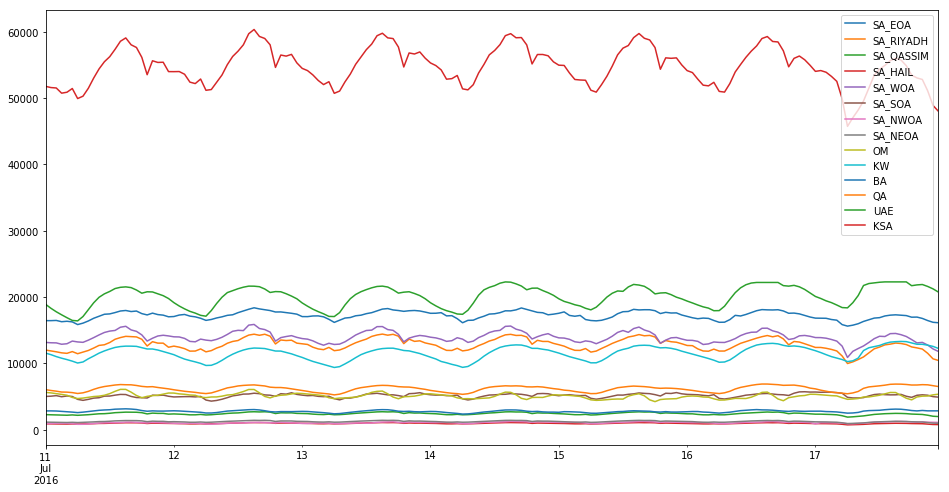

In [34]:
AddKSACountry(datain['Demand']['DA'], Operator='sum', DropKSAZones = False).plot()

## -- Operation cost

132.26277615645193
132.26277615645193
0.0


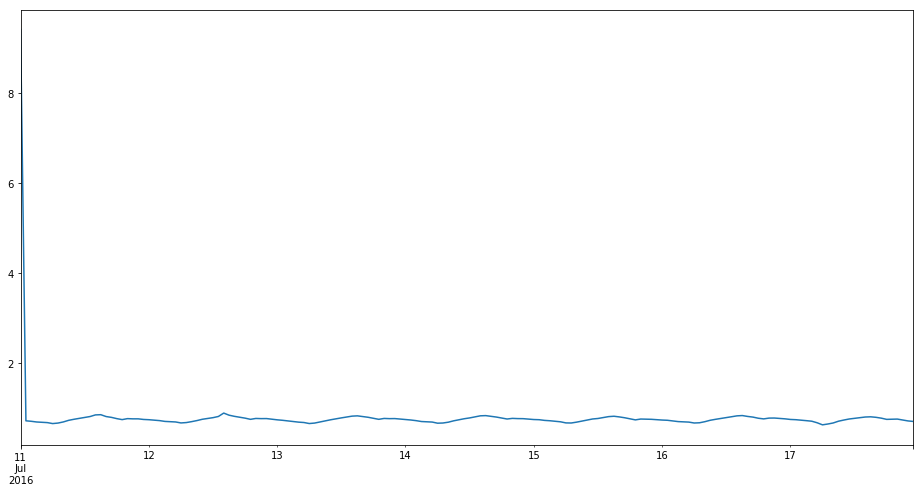

In [35]:
AA = results['TotalSystemCost']*(1/1000000)   #Million
AA.plot()
print (AA.sum())
print (AA['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum())    #Summer
print (AA['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum() + AA['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum())   #Winter


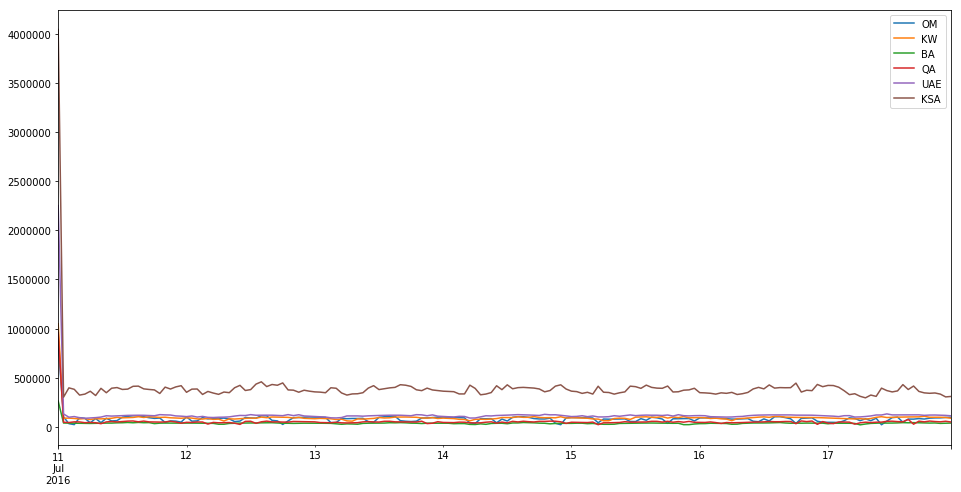

In [37]:
AddKSACountry(results['TotalNodeOperationCost'], Operator='sum', DropKSAZones = True).plot()

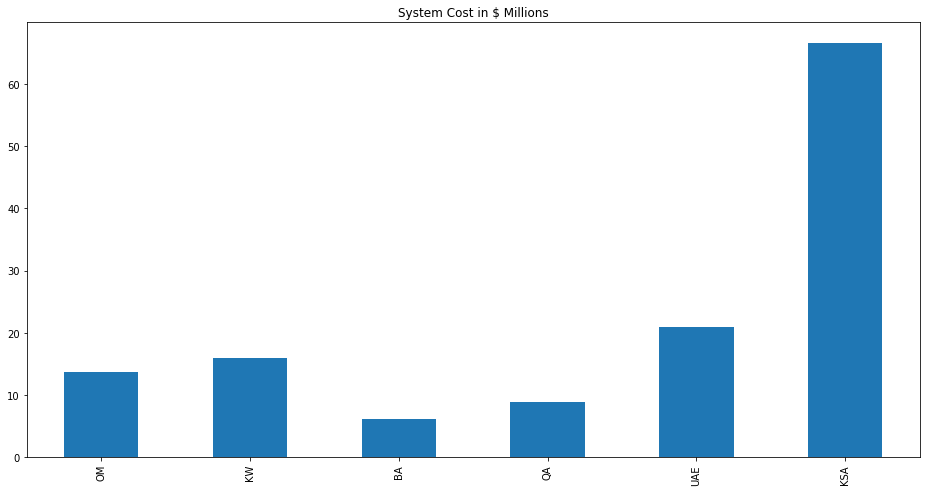

In [51]:
AddKSACountry(results['TotalNodeOperationCost']/1000000, Operator='sum', DropKSAZones = True).sum().plot.bar(title='System Cost in $ Millions')


In [54]:
AddKSACountry(results['TotalNodeOperationCost']/1000000, Operator='sum', DropKSAZones = True).sum()


OM     13.766098
KW     15.921698
BA      6.233546
QA      8.865211
UAE    20.934411
KSA    66.541812
dtype: float64

## -- Average electricty cost (Electricty price)

In [61]:
FindAverageElectricityCostPlusKSA(datain['Demand']['DA'], results['TotalNodeOperationCost'], DropKSAZones = True)

OM     16.174904
KW      8.225690
BA     13.477669
QA      8.558200
UAE     6.199338
KSA     7.237742
dtype: float64

In [63]:
FindAverageElectricityCostPlusKSA2(datain['Demand']['DA'], results['TotalNodeOperationCost'], DropKSAZones = True).head(5)

,OM,KW,BA,QA,UAE,KSA
2016-07-11 00:00:00,150.224226,90.842746,92.962313,158.585724,119.155844,78.112199
2016-07-11 01:00:00,18.306616,7.724694,13.586383,7.829608,7.161833,5.855042
2016-07-11 02:00:00,5.894590,8.026078,13.433693,7.517579,5.490859,7.691331
2016-07-11 03:00:00,4.196034,7.874845,13.343484,8.892104,6.025104,7.520947
2016-07-11 04:00:00,18.018963,7.561107,13.249336,8.762285,5.481124,6.342585


In [68]:
FindAverageElectricityCostPlusKSA2(datain['Demand']['DA'], results['TotalNodeOperationCost'], DropKSAZones = True).mean()

OM     16.060409
KW      8.217826
BA     13.428771
QA      8.571756
UAE     6.243229
KSA     7.255984
dtype: float64

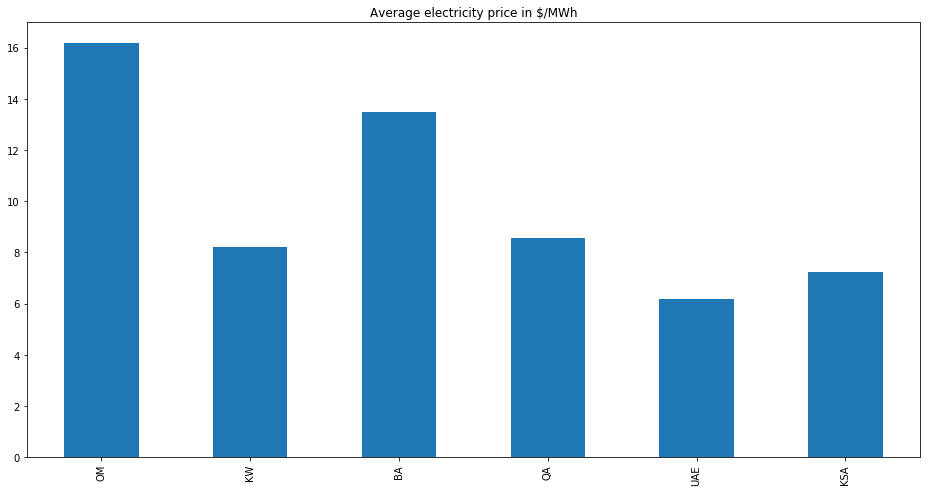

In [64]:
FindAverageElectricityCostPlusKSA(datain['Demand']['DA'], results['TotalNodeOperationCost'], DropKSAZones = True).plot.bar(title='Average electricity price in $/MWh')

Text(0.5, 1.0, 'Daily average electricity prices $/MWh')

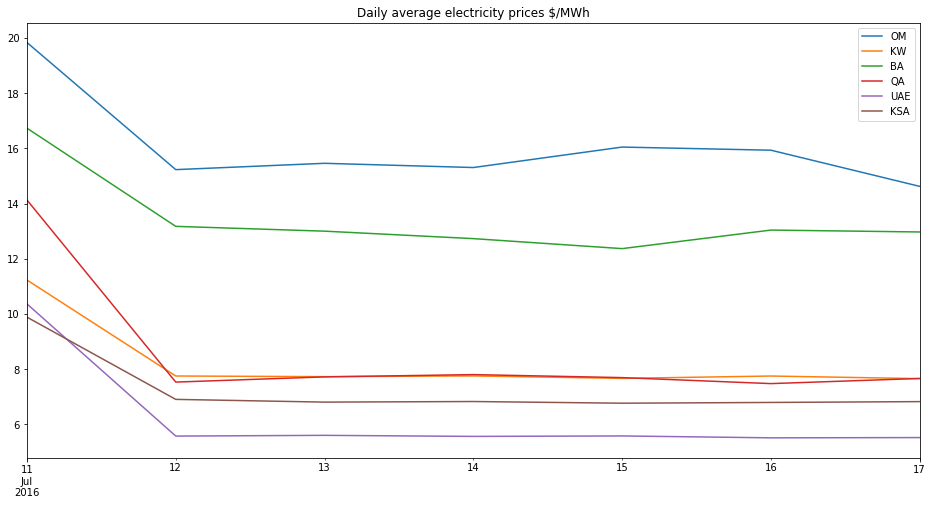

In [71]:
FindAverageElectricityCostPlusKSA2(datain['Demand']['DA'], results['TotalNodeOperationCost'], DropKSAZones = True).resample('D').mean().plot()
plt.title('Daily average electricity prices $/MWh')

## -- Power flows

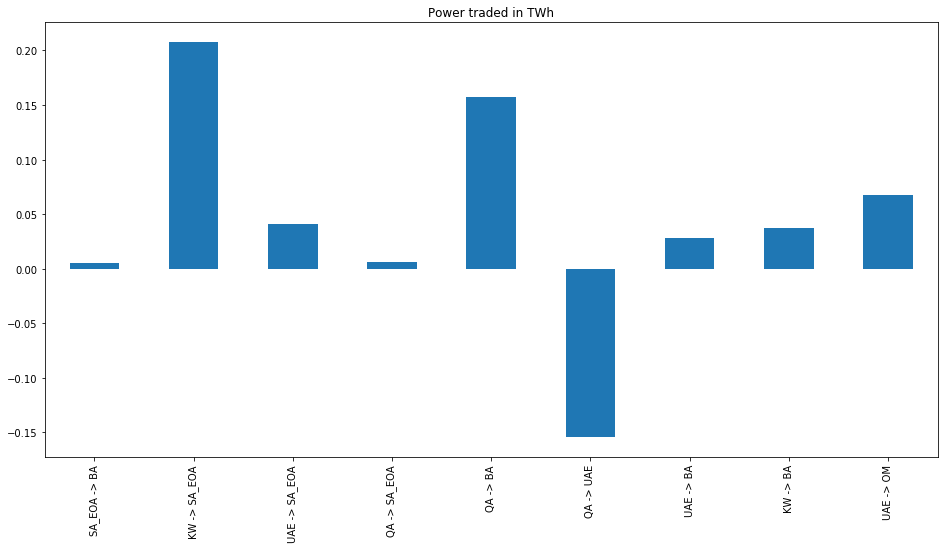

In [80]:
FindNetPowerFlow(results['PowerFlow']/(1000000)).sum().plot.bar(title='Power traded in TWh')

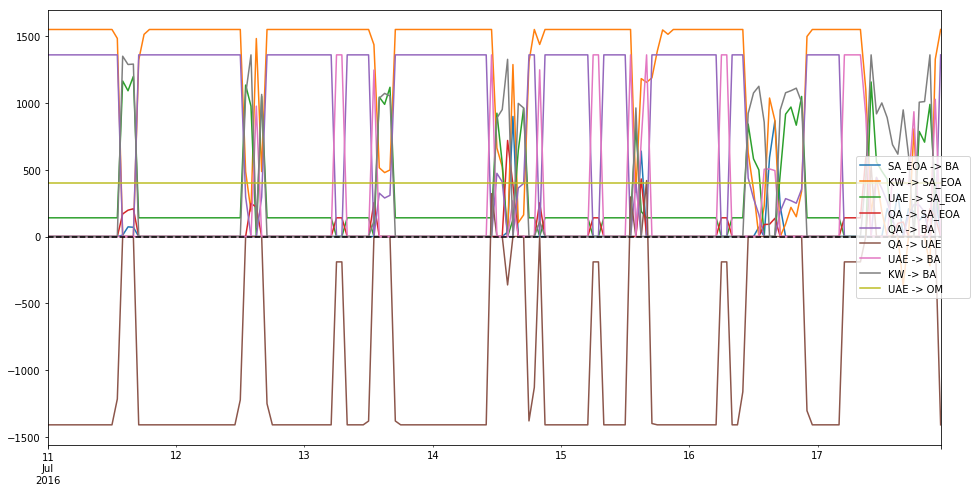

In [81]:
GCCFlows = FindNetPowerFlow(results['PowerFlow'])
ax = GCCFlows.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')

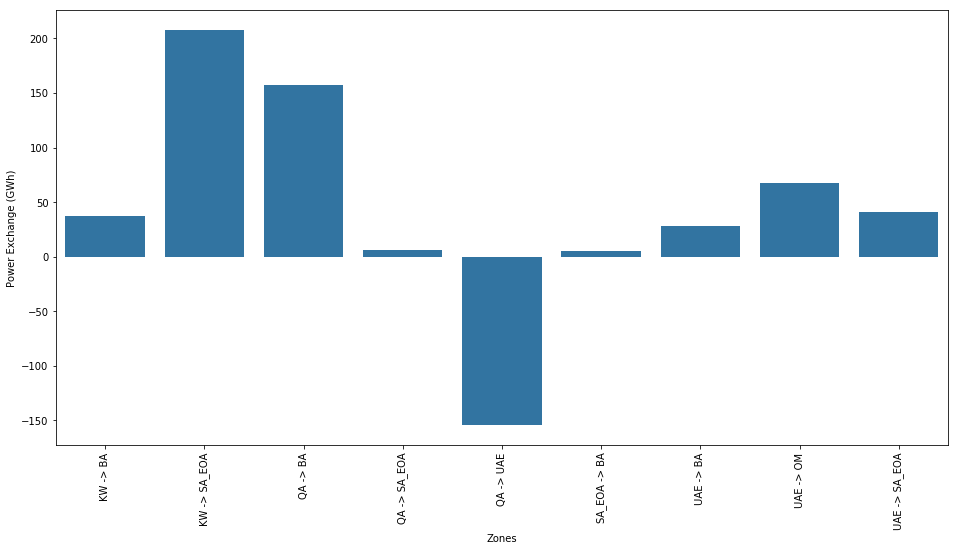

In [91]:
GCCFlows = FindNetPowerFlow(results['PowerFlow'])
df = (GCCFlows/1000).T.sort_index().sum(axis=1).reset_index()
df.columns = [ 'Zones', 'Power Exchange (GWh)']
aa = sns.barplot(data=df, x='Zones', y='Power Exchange (GWh)',color='#1f77b4')

for item in aa.get_xticklabels():
    item.set_rotation(90)

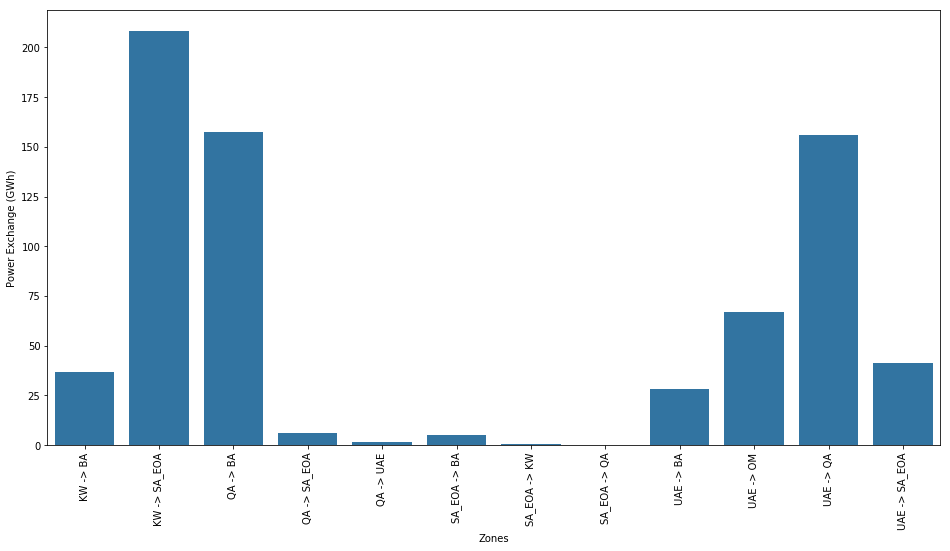

In [87]:
NewOutputFlow = results['PowerFlow'].copy()
columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()
#pd.DataFrame((GCCFlows.sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

df = (GCCFlows/1000).T.sort_index().sum(axis=1).reset_index()
df.columns = [ 'Zones', 'Power Exchange (GWh)']
aa = sns.barplot(data=df, x='Zones', y='Power Exchange (GWh)',color='#1f77b4')

for item in aa.get_xticklabels():
    item.set_rotation(90)
#Summer
#pd.DataFrame((GCCFlows['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#Winter
#pd.DataFrame(((GCCFlows['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum()+GCCFlows['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum())/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#A = pd.DataFrame((GCCFlows.sum()),columns=['Power traded'])
#print A
#print A.sum()


                Power traded
SA_EOA -> BA     5127.092482
KW -> SA_EOA   208271.172273
SA_EOA -> KW      585.442329
UAE -> SA_EOA   41401.886424
QA -> SA_EOA     6092.424703
SA_EOA -> QA      140.000000
QA -> BA       157393.327849
QA -> UAE        1559.810519
UAE -> QA      156094.136878
UAE -> BA       28170.056423
KW -> BA        37019.556475
UAE -> OM       67200.000000
Power traded    709054.906354
dtype: float64


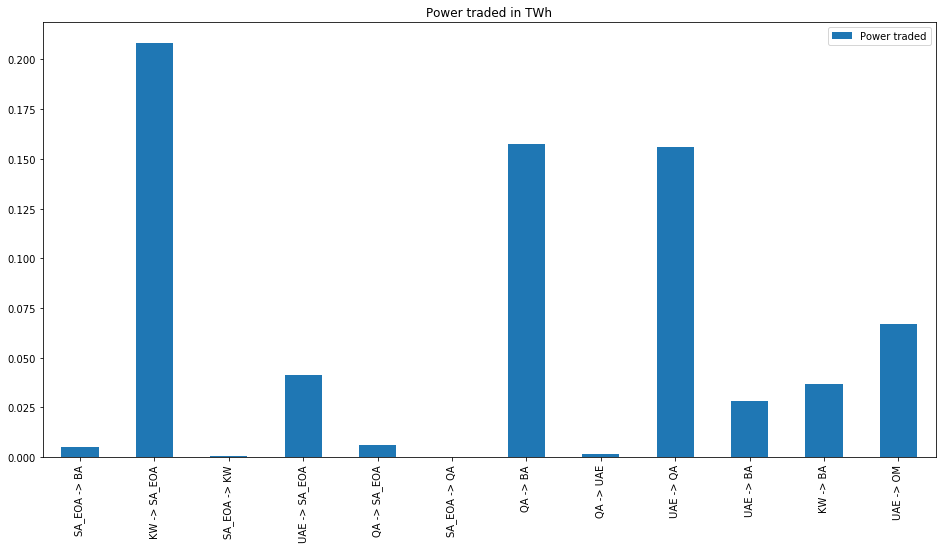

In [92]:
NewOutputFlow = results['PowerFlow'].copy()
columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()
pd.DataFrame((GCCFlows.sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')
#Summer
#pd.DataFrame((GCCFlows['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#Winter
#pd.DataFrame(((GCCFlows['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum()+GCCFlows['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum())/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

A = pd.DataFrame((GCCFlows.sum()),columns=['Power traded'])
print (A)
print (A.sum())


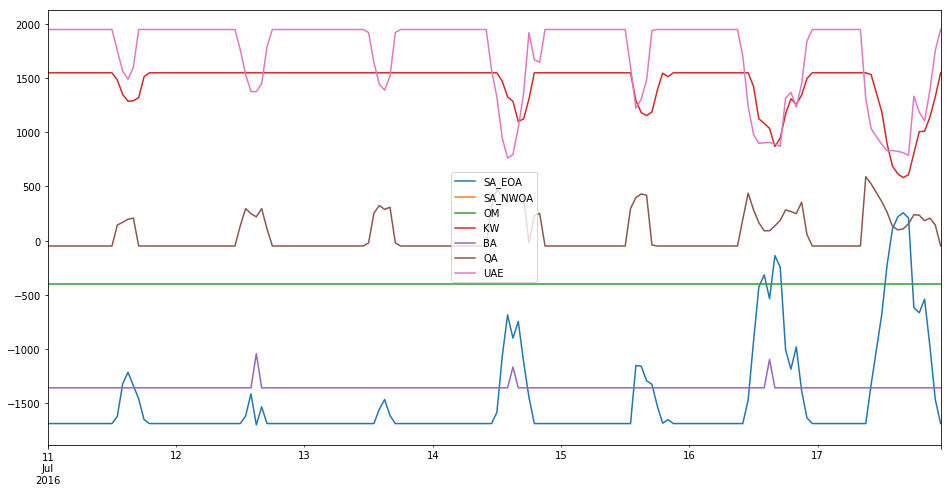

In [93]:
#Net Exports (for GCC countries and EOA) taking into account that exports of EOA does not include exports to other KSA regions 

NewOutputFlow = results['PowerFlow'].copy()
OriginalColumns = []
reverseindex = []
for j,column in enumerate(NewOutputFlow):
    A = column.split(' -> ')
    OriginalColumns.append(A)
    B = list(reversed(A))
    if B in OriginalColumns:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow.iloc[:,D] = NewOutputFlow.iloc[:,D] - NewOutputFlow.iloc[:,j]
NewOutputFlow = NewOutputFlow.drop(NewOutputFlow.columns[reverseindex], axis=1).copy()

columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()

NetExports=pd.DataFrame(columns=inputs['config']['zones'], index=NewOutputFlow.index)
for zone in inputs['config']['zones']:
    for column in GCCFlows:
        [from_node, to_node] = column.split(' -> ')
        if (from_node == zone):
            tmp = pd.Series(GCCFlows[column], index=NetExports.index)
            if NetExports.loc[NetExports.index, zone].isnull().values.any():
                NetExports.loc[NetExports.index, zone] = np.array(tmp)
            else:
                NetExports.loc[NetExports.index, zone] += np.array(tmp)
    for column in GCCFlows:
        [from_node, to_node] = column.split(' -> ')
        if (to_node == zone):
            tmp = pd.Series(GCCFlows[column], index=NetExports.index)
            if NetExports.loc[NetExports.index, zone].isnull().values.any():
                NetExports.loc[NetExports.index, zone] = np.array(tmp)*(-1)
            else:
                NetExports.loc[NetExports.index, zone] += np.array(tmp)*(-1)
                
NetExports.drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1).plot()

Text(0.5, 1.0, 'Net Power Exports (GWh) (Int)')

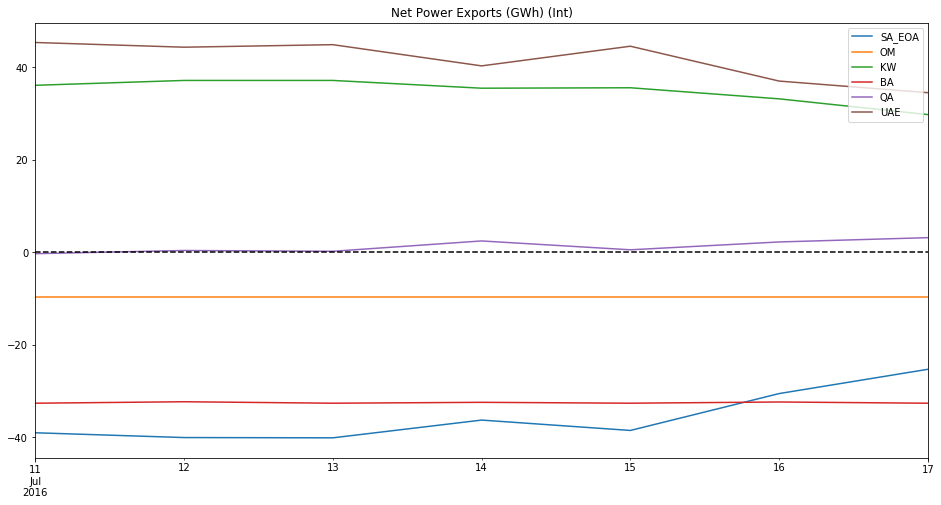

In [94]:
#Net Exports (for GCC countries and EOA) taking into account that exports of EOA does not include exports to other KSA regions 

NewOutputFlow = results['PowerFlow'].copy()
OriginalColumns = []
reverseindex = []
for j,column in enumerate(NewOutputFlow):
    A = column.split(' -> ')
    OriginalColumns.append(A)
    B = list(reversed(A))
    if B in OriginalColumns:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow.iloc[:,D] = NewOutputFlow.iloc[:,D] - NewOutputFlow.iloc[:,j]
NewOutputFlow = NewOutputFlow.drop(NewOutputFlow.columns[reverseindex], axis=1).copy()

columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()

NetExports=pd.DataFrame(columns=inputs['config']['zones'], index=NewOutputFlow.index)
for zone in inputs['config']['zones']:
    for column in GCCFlows:
        [from_node, to_node] = column.split(' -> ')
        if (from_node == zone):
            tmp = pd.Series(GCCFlows[column], index=NetExports.index)
            if NetExports.loc[NetExports.index, zone].isnull().values.any():
                NetExports.loc[NetExports.index, zone] = np.array(tmp)
            else:
                NetExports.loc[NetExports.index, zone] += np.array(tmp)
    for column in GCCFlows:
        [from_node, to_node] = column.split(' -> ')
        if (to_node == zone):
            tmp = pd.Series(GCCFlows[column], index=NetExports.index)
            if NetExports.loc[NetExports.index, zone].isnull().values.any():
                NetExports.loc[NetExports.index, zone] = np.array(tmp)*(-1)
            else:
                NetExports.loc[NetExports.index, zone] += np.array(tmp)*(-1)


#(NetExports.drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1).sum())/1000000

A = ((NetExports.drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA','SA_NWOA'], axis=1))/1000)
A.resample('D').sum().plot().axhline(0, ls='--',color='k')
plt.title("Net Power Exports (GWh) (Int)")

#df = (NetExports.drop(['SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1)/1000000).T.sort_index().sum(axis=1).reset_index()

#df.columns = [ 'Zone', 'Net Power Exports (TWh)']
#sns.barplot(data=df, x='Zone', y='Net Power Exports (TWh)',color='#1f77b4').axhline(0, ls='--',color='k')
#plt.title("Int")



In [32]:
#NewOutputFlow = results['PowerFlow'].copy()
#OriginalColumns = []
#reverseindex = []
#for j,column in enumerate(NewOutputFlow):
#    A = column.split(' -> ')
#    OriginalColumns.append(A)
#    B = list(reversed(A))
#    if B in OriginalColumns:
#        reverseindex.append(j)
#        D = [i for i, C in enumerate(OriginalColumns) if C==B]
#        D = int(''.join(map(str,D)))
#        NewOutputFlow.iloc[:,D] = NewOutputFlow.iloc[:,D] - NewOutputFlow.iloc[:,j]
#NewOutputFlow = NewOutputFlow.drop(NewOutputFlow.columns[reverseindex], axis=1).copy()
#
#columns = []
#for i,column in enumerate(NewOutputFlow):
#    [from_node, to_node] = column.split('->')
#    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
#        columns.append(i)
#GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()
#pd.DataFrame((GCCFlows.sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')
#
#A = pd.DataFrame((GCCFlows.sum()),columns=['Power traded'])
#print A
#print A.sum()
#Summer
#pd.DataFrame((GCCFlows['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#Winter
#pd.DataFrame(((GCCFlows['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum()+GCCFlows['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum())/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')



## -- Power exports/imports

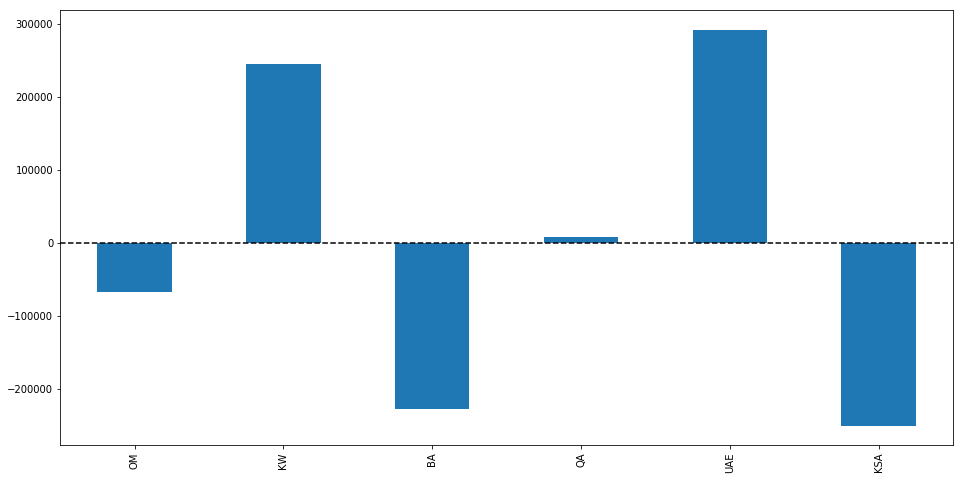

In [53]:
KSA = pd.Series(results['KSANetExportedPower'])
KSA.name = 'KSA'
GCCPowerExhange = results['NetExportedPower'].drop(['SA_RIYADH','SA_SOA','SA_WOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_EOA','SA_QASSIM'], axis=1)
GCCPowerExhange['KSA'] = KSA
GCCPowerExhange.sum().plot(kind='bar').axhline(0, ls='--',color='k')


In [97]:
FindUniquePowerExchange(results['ExportedPowerToNode'])


SA_EOA                                       \
                       SA_RIYADH   SA_QASSIM     SA_HAIL       SA_WOA   
2016-07-11 00:00:00  1194.242482    0.000000  113.451674   706.172818   
2016-07-11 01:00:00     0.000000  621.238007  103.831674     0.000000   
2016-07-11 02:00:00     0.000000    0.000000   92.956674     0.000000   
2016-07-11 03:00:00  1308.648000    0.000000   80.595674  2953.463482   
2016-07-11 04:00:00     0.000000    0.000000   74.746674  1712.616518   
2016-07-11 05:00:00     0.000000    0.000000   95.210674   746.606682   
2016-07-11 06:00:00  1016.071573    0.000000   70.405674  3555.732611   
2016-07-11 07:00:00     0.000000    0.000000   89.909674  1364.772940   
2016-07-11 08:00:00     0.000000    0.000000    0.000000     0.000000   
2016-07-11 09:00:00   364.416324    0.000000    0.000000  4204.839971   
2016-07-11 10:00:00  2683.066524    0.000000    0.000000  2220.613677   
2016-07-11 11:00:00  2807.047823    0.000000    0.000000  2589.613262   
2016-07-11 12:00:00  2972.689368  449.759047    0.000000  2797.037920   
2016-07-11 13:00:00  1688.776015    0.000000    0.000000   759.718961   
2016-07-11 14:00:00  1943.300169    0.000000    0.000000   582.212367   
2016-07-11 15:00:00   998.563404    0.000000    0.000000   674.260996   
2016-07-11 16:00:00   955.022164    0.000000    0.000000   845.384599   
2016-07-11 17:00:00  1854.709901    0.000000    0.000000   842.207708   
2016-07-11 18:00:00  1907.792692    0.000000    0.000000     0.000000   
2016-07-11 19:00:00  1714.827931    0.000000    0.000000  3562.810107   
2016-07-11 20:00:00   614.334997  722.309791    0.000000   553.426091   
2016-07-11 21:00:00     0.000000    0.000000    0.000000  1665.447010   
2016-07-11 22:00:00  1891.051280    0.000000    0.000000     0.000000   
2016-07-11 23:00:00     0.000000    0.000000    0.000000     0.000000   
2016-07-12 00:00:00   937.154472    0.000000    0.000000     0.000000   
2016-07-12 01:00:00  1117.111911    0.000000    0.000000     0.000000   
2016-07-12 02:00:00  1190.410798    0.000000    0.000000     0.000000   
2016-07-12 03:00:00  1712.819275    0.000000  100.766674  1877.180725   
2016-07-12 04:00:00     0.000000    0.000000    0.000000     0.000000   
2016-07-12 05:00:00     0.000000    0.000000  126.749674     0.000000   
...                          ...         ...         ...          ...   
2016-07-16 18:00:00  1382.779021    0.000000    0.000000     0.000000   
2016-07-16 19:00:00   232.006528    0.000000    0.000000     0.000000   
2016-07-16 20:00:00   137.569205    0.000000    0.000000  2176.269293   
2016-07-16 21:00:00   655.135685    0.000000    0.000000   991.886060   
2016-07-16 22:00:00   382.141969    0.000000    0.000000  4468.329637   
2016-07-16 23:00:00  2257.754047    0.000000    0.000000   974.488482   
2016-07-17 00:00:00  1877.392060    0.000000    0.000000     0.000000   
2016-07-17 01:00:00  1240.092280    0.000000    0.000000  1170.189712   
2016-07-17 02:00:00  1373.826798    0.000000    0.000000     0.000000   
2016-07-17 03:00:00  1199.958798    0.000000  120.889674     0.000000   
2016-07-17 04:00:00   968.595798    0.000000  102.745674  2158.123432   
2016-07-17 05:00:00  3477.243757    0.000000    0.000000     0.000000   
2016-07-17 06:00:00  1749.929232    0.000000    0.000000  1212.804892   
2016-07-17 07:00:00   302.177716    0.000000    0.000000  1411.835369   
2016-07-17 08:00:00  1310.557699    0.000000    0.000000   879.271317   
2016-07-17 09:00:00   837.050702    0.000000    0.000000     0.000000   
2016-07-17 10:00:00     0.000000    0.000000    0.000000     0.000000   
2016-07-17 11:00:00     0.000000    0.000000  127.878674  1655.598602   
2016-07-17 12:00:00   512.297914    0.000000    0.000000     0.000000   
2016-07-17 13:00:00     0.000000    0.000000    0.000000  2432.296352   
2016-07-17 14:00:00   725.996200    0.000000    0.000000     0.000000   
2016-07-17 15:00:00     0.000000    0.000000    0.000000  4217.672427   
2016-07-17 

In [27]:
KSAExchange = FindCountryExchange(results['ExportedPowerToNode'], ['SA_RIYADH','SA_SOA','SA_WOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_EOA'], ['BA','KW','OM','QA','UAE'])
KSAExchange.sum()

1591528.551162436

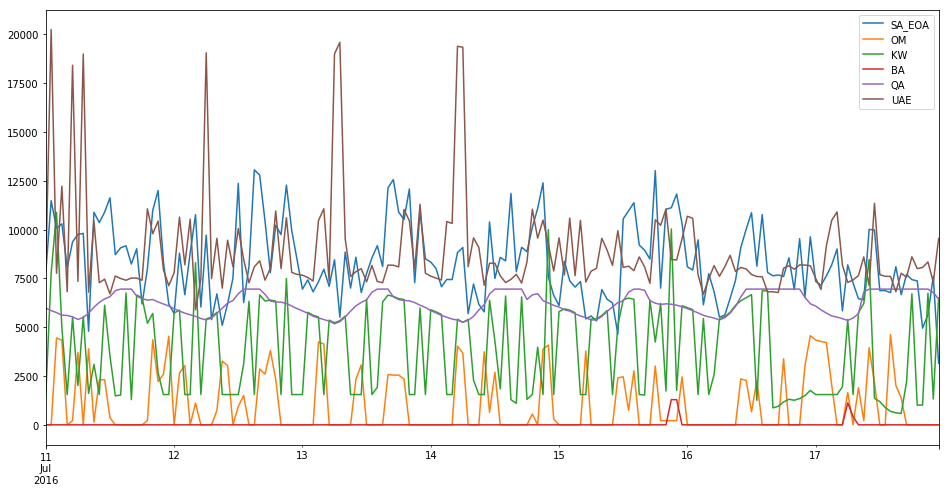

In [100]:
results['TotalExportedPower'].drop(['SA_RIYADH','SA_SOA','SA_WOA','SA_HAIL','SA_NEOA','SA_NWOA'], axis=1).plot()
#   ,'SA_HAIL','SA_NEOA','SA_QASSIM'

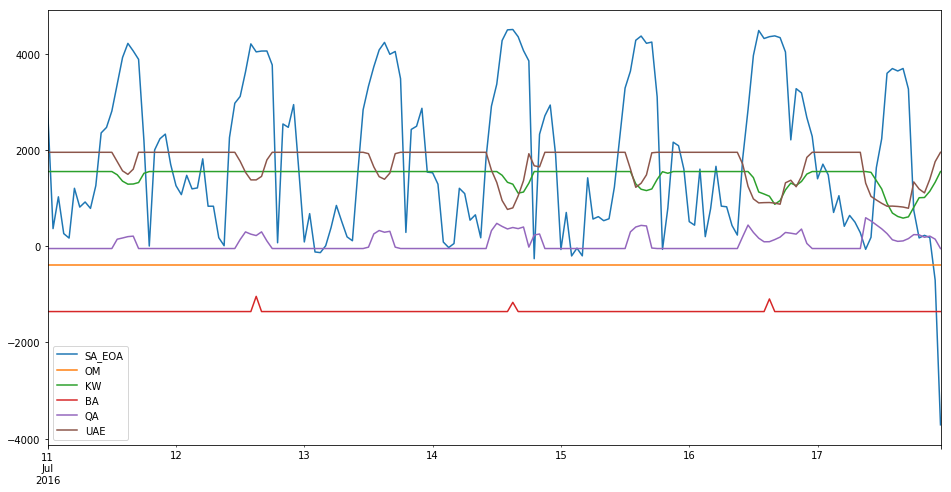

In [102]:
#Net Exports (for GCC countries and EOA) NOT taking into account that exports of EOA does not include exports to other KSA regions 

results['NetExportedPower'].drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA','SA_NWOA'], axis=1).plot()


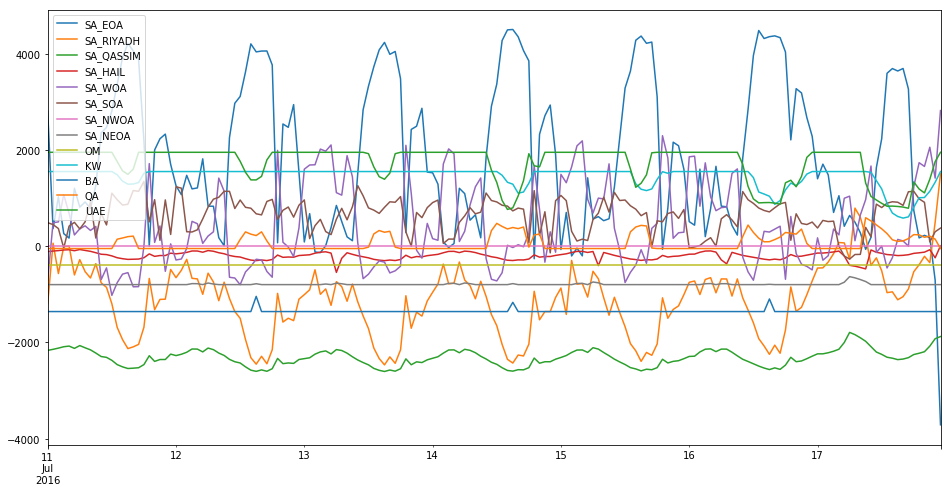

In [103]:
results['NetExportedPower'].plot()

## -- Node shadow price (marginal price)

In [36]:
results['NodeShadowPrice'].std()

SA_EOA       3.943621e+00
SA_RIYADH    3.943621e+00
SA_QASSIM    3.943597e+00
SA_HAIL      3.943597e+00
SA_WOA       3.943597e+00
SA_SOA       3.943597e+00
SA_NWOA      4.852114e-15
SA_NEOA      3.951626e+00
OM           4.598184e+00
KW           8.991707e+00
BA           1.300437e+01
QA           3.563335e-14
UAE          1.327663e+01
dtype: float64

Text(0.5, 1.0, 'Marginal nodal prices ($/MWh)')

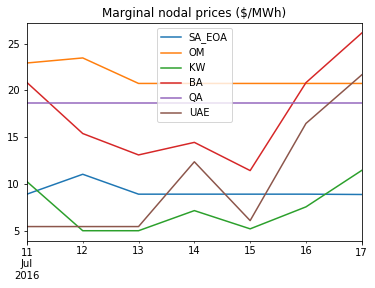

In [37]:
results['NodeShadowPrice'].resample('D',how='mean').drop([ 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).plot()
plt.title('Marginal nodal prices ($/MWh)')


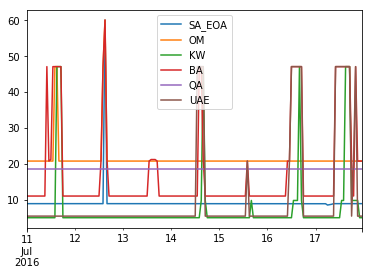

In [38]:
results['NodeShadowPrice'].drop(columns=[ 'SA_RIYADH','SA_QASSIM', 'SA_HAIL',  'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot()


## -- Power plants indicators

In [39]:
PPindicators = post.get_indicators_powerplant(inputs,results)
PPindicators.head(5)

,Nunits,PowerCapacity,Zone,Technology,Fuel,startups,CF,Generation
"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] - SA_EOA - STUR - GAS -",12,573.000000,SA_EOA,STUR,GAS,0,1.000000,1.155168e+06
"[12, 13, 14, 15, 16, ... _EOA - GTUR - GAS -",81,70.372260,SA_EOA,GTUR,GAS,0,0.000000,0.000000e+00
"[30, 31, 32, 33, 34, 35] - SA_EOA - COMC - GAS -",6,665.000000,SA_EOA,COMC,GAS,0,1.000000,6.703200e+05
"[58, 59, 60, 61, 62, 63] - SA_EOA - GTUR - DSL -",6,20.266667,SA_EOA,GTUR,DSL,0,0.000000,0.000000e+00
"[105, 106, 107, 108, ... _EOA - ICEN - GAS -",8,1462.500000,SA_EOA,ICEN,GAS,3,0.720626,1.416462e+06


## --Fuel power per zone

In [40]:
fuels = PPindicators.Fuel.unique()
countries = PPindicators.Zone.unique()

GenPerCountry = pd.DataFrame(index=countries, columns=fuels)
# First make sure that all fuels are present. If not, initialize an empty series
for f in ['NUC', 'LFG', 'DSL', 'MSW', 'GAS', 'OIL', 'WST', 'SUN', 'WIN', 'FlowIn', 'HFO']:
    if f not in GenPerCountry:
        GenPerCountry[f] = 0
for c in countries:
    for f in fuels:
        tmp = PPindicators[(PPindicators.Fuel == f) & (PPindicators.Zone == c)]
        GenPerCountry.loc[c, f] = tmp.Generation.sum()
    NetImports = post.get_imports(results['PowerFlow'], c)
    if NetImports > 0:
        GenPerCountry.loc[c, 'FlowIn'] = NetImports
GenPerCountry = GenPerCountry.copy()
A = GenPerCountry.drop(['BA','KW','OM','QA','UAE']).sum()
A.name = 'KSA'
GenPerCountry = GenPerCountry.append(A, ignore_index=False)
GenPerCountry.loc['KSA', 'FlowIn'] = 'TBD'
GenPerCountry

,GAS,DSL,SUN,OIL,HFO,LFG,MSW,WIN,NUC,WST,FlowIn
SA_EOA,3.24195e+06,0,266.102,0,0.0,0,0.0,0,0.0,0.0,0
SA_HAIL,0,0,0,126036,0.0,0,0.0,0,0.0,0.0,31903
SA_NEOA,0,50968.6,0,21227.3,0.0,0,0.0,0,0.0,0.0,133388
SA_NWOA,0,10785.6,27.8773,164956,0.0,0,0.0,0,0.0,0.0,0
SA_QASSIM,0,0,0,15339.8,0.0,0,0.0,0,0.0,0.0,389049
SA_RIYADH,839882,0,115.429,1.3923e+06,0.0,0,0.0,0,0.0,0.0,0
SA_SOA,261238,516339,12.6715,189343,0.0,0,0.0,0,0.0,0.0,0
SA_WOA,325338,0,62.8507,421028,1623888.0,0,0.0,0,0.0,0.0,0
BA,458964,0,76.0291,0,0.0,0,0.0,0,0.0,0.0,3469.36
KW,1.92711e+06,0,143.611,8397.67,0.0,0,0.0,0,0.0,0.0,0


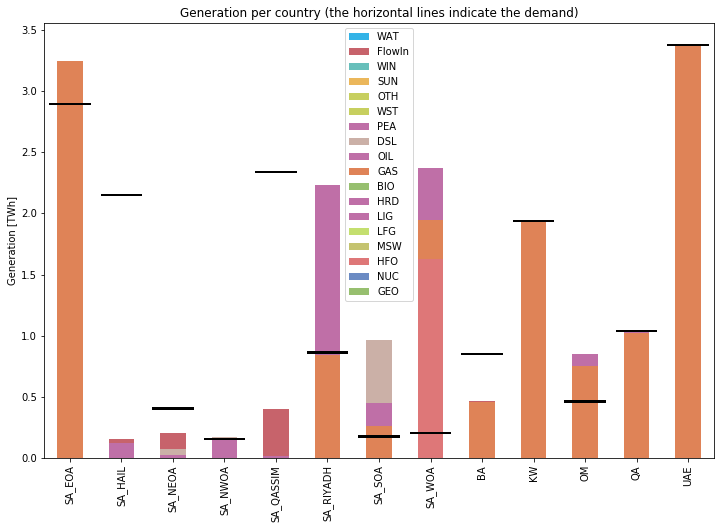

In [49]:
#Plots the generation for each country, disaggregated by fuel type
ax = ds.plot_energy_zone_fuel(inputs,results,PPindicators)

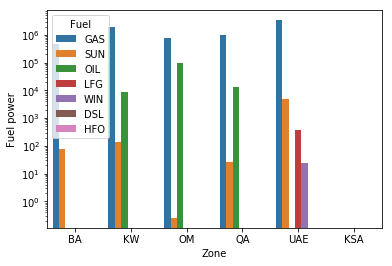

In [56]:
df = results['NodeFuelPower'].T.sort_index().sum(axis=1)
KSA = df['SA_EOA']+df['SA_HAIL']+df['SA_NEOA']+df['SA_NWOA']+df['SA_QASSIM']+df['SA_RIYADH']+df['SA_SOA']+df['SA_WOA']
df['KSA','DSL'] = KSA['DSL']
df['KSA','GAS'] = KSA['GAS']
df['KSA','HFO'] = KSA['HFO']
df['KSA','OIL'] = KSA['OIL']
df['KSA','SUN'] = KSA['SUN']
#df['KSA','LFG'] = KSA['LFG']
#df['KSA','MSW'] = KSA['MSW']
#df['KSA','WIN'] = KSA['WIN']

df = df.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])
df = df.reset_index()
df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel').set_yscale('log')

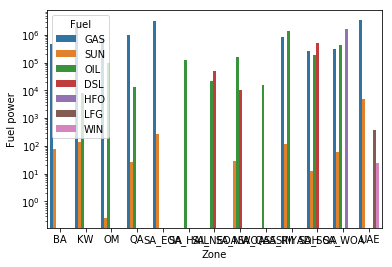

In [53]:
df = results['NodeFuelPower'].T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel').set_yscale('log')


## -- Fuel consumption

## -- Transmission congestion of GCCIA interconnector

In [42]:
(results['LineCongestion'].sum()/len(datain['Demand']['DA']))*100


SA_RIYADH -> SA_QASSIM    10.119048
SA_HAIL -> SA_NEOA        85.119048
dtype: float64

In [51]:
(results['LineCongestion_KSA_GCC'].sum()/len(datain['Demand']['DA']))*100

Series([], dtype: float64)

In [50]:
columns=['KSA - GCC','KW - GCC','BA - GCC','QA - GCC','UAE - GCC','UAE - OM','Ghunan - Salwa','Ghunan - Alfadhili']
A_list = []
A_list.append((results['LineCongestion_KSA_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_KW_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_BA_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_QA_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_UAE_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_OM_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_Ghunan_Salwa'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_Ghunan_Alfadhili'].sum()/len(datain['Demand']['DA']))*100)

A = pd.DataFrame([A_list],columns=columns).T.reset_index()
A.columns = ['Line', '% Utilization']
aa = sns.barplot(data=A, x='Line', y='% Utilization',color='#1f77b4')
for item in aa.get_xticklabels():
    item.set_rotation(90)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

## -- Government spending on fuel subsidy

In [45]:
KSA_DSL =(73.88409558-2.284372129)
KSA_GAS =(30.82197619-2.55713298)
KSA_HFO =(52.60874918-1.466089575)
KSA_OIL =(65.66717494-2.488942768)

OM_DSL =(73.88409558-0.67)
OM_GAS =(30.82197619-3)
OM_HFO =(52.60874918-0.43)
OM_OIL =(65.66717494-0.73)

KW_DSL =(73.88409558-0.67)
KW_GAS =(30.82197619-1.5)
KW_HFO =(52.60874918-0.43)
KW_OIL =(65.66717494-0.73)

UAE_DSL =(73.88409558-0.67)
UAE_GAS =(30.82197619-0.75)
UAE_HFO =(52.60874918-0.43)
UAE_OIL =(65.66717494-0.73)

QA_DSL =(73.88409558-0.67)
QA_GAS =(30.82197619-0.75)
QA_HFO =(52.60874918-0.43)
QA_OIL =(65.66717494-0.73)

BA_DSL =(73.88409558-0.67)
BA_GAS =(30.82197619-2.5)
BA_HFO =(52.60874918-0.43)
BA_OIL =(65.66717494-0.73)


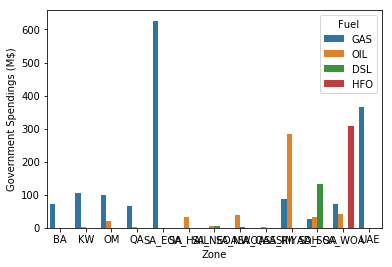

In [105]:
#results['NodeFuelConsumption']
df = results['NodeFuelConsumption'].T.sort_index()
df_masked = df[df.index.droplevel(0).isin(['HFO','OIL','GAS','DSL'])].sum(axis=1)

for zone in ['BA', 'KW', 'OM', 'QA', 'SA_EOA', 'SA_HAIL', 'SA_NEOA', 'SA_NWOA',
       'SA_QASSIM', 'SA_RIYADH', 'SA_SOA', 'SA_WOA', 'UAE']:
    for fuel in ['GAS', 'OIL', 'DSL', 'HFO']:
        try:
            df_masked[zone][fuel]
        except:
            df_masked.ix[(zone,fuel)] = 0

Index1=df_masked.index

list1=[BA_DSL,BA_GAS,BA_HFO,BA_OIL,KW_DSL,KW_GAS,KW_HFO,KW_OIL,OM_DSL, OM_GAS,OM_HFO,OM_OIL,
                QA_DSL, QA_GAS,QA_HFO,QA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,UAE_DSL, UAE_GAS,UAE_HFO,UAE_OIL]
'''
df_masked.mul([BA_DSL, BA_GAS,BA_HFO,BA_OIL,KW_DSL,KW_GAS,KW_HFO,KW_OIL,OM_DSL, OM_GAS,OM_HFO,OM_OIL,
                QA_DSL, QA_GAS,QA_HFO,QA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,UAE_DSL, UAE_GAS,UAE_HFO,UAE_OIL], axis=0)
'''
#np.array(df_masked)*np.array(list1)
#np.multiply(np.array(df_masked), np.array(list1))
df_masked=pd.DataFrame((1/1000000)*np.multiply(np.array(df_masked), np.array(list1)),index=Index1)
#df_masked=pd.DataFrame(np.multiply(np.array(df_masked), np.array(list1)))
#df_masked.columns = ['Zone', 'Fuel', 'Government spendings ($)']
#df.columns = ['Zone', 'Fuel', 'Government spendings ($)']
#sns.barplot(data=df_masked, x='Zone', y='Government spendings ($)', hue='Fuel')

df = df_masked.reset_index()
df.columns = ['Zone', 'Fuel', 'Government Spendings (M$)']
sns.barplot(data=df, x='Zone', y='Government Spendings (M$)', hue='Fuel')